In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("netflix_titles.csv")

# Part 1:
# o Display the dataset rows using appropriate pandas methods
# o Display the general statistics of each column in the dataset
# o Replace the missing values with the mode of the respective columns
# o Use the .info() method to obtain a preview of the dataset
# o Create a column that shows the full release date in YY-MM-DD format taken from
# the “date-added” column and drop the original “date-added” column
# o Display a dataframe that has only Movies

# OR

# o Display a dataframe that has only TV Shows
# o Display the Movies or TV Shows that have been produced from India and those from
# the United States

#  Part 2 – EDA (Exploratory Data Analysis):
# o Visualise the distribution of the different ratings in the dataset
# o Visualise the distribution of the number of TV Shows versus the number of Movies
# o Visualise the distribution of the different TV Shows based on the number of Seasons
# o Visualise the distribution of movies that have been produced in India versus those
# produced in the United States

#  Part 3:
# o Note apporpriate observations from analysis done in Part 1
# o Note appropriate observations from analysis done in Part 2

In [2]:
notes = []
def AddNote(note):
    if(note not in notes):
        notes.append(note)

In [3]:
# Display the dataset rows using appropriate pandas methods
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
# Display the general statistics of each column in the dataset
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [42]:
# df.fillna(lambda x: print(x))

In [7]:
# o Replace the missing values with the mode of the respective columns
null_count = pd.isnull(df).sum().sum()
for i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
AddNote("Part 1")
AddNote(f"There were {null_count} missing values in the original dataset.")

In [8]:
# Use the .info() method to obtain a preview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Create a column that shows the full release date in YY-MM-DD format taken from the “date-added” column and drop the original “date-added” column
months = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]

def ChangeFormat(date):
    date = date.split(" ")
    year = date[2][-2] + date[2][-1]
    month = date[0]
    for i in range(len(months)):
        if(month == months[i]): 
            month = str(i+1)
            if(len(month) == 1): month = "0" + month
            break
    day = date[1].removesuffix(",")
    return f"{year}-{month}-{day}"

df.date_added = df.date_added.apply(ChangeFormat)

AttributeError: 'str' object has no attribute 'removesuffix'

In [12]:
# Display a dataframe that has only Movies
movies_df = df[df.type == "Movie"]
AddNote(f"There are {movies_df.count()[0]} movies on Netflix.")
movies_df['type']

0       Movie
6       Movie
7       Movie
9       Movie
12      Movie
        ...  
8801    Movie
8802    Movie
8804    Movie
8805    Movie
8806    Movie
Name: type, Length: 6131, dtype: object

In [13]:
# Display the Movies or TV Shows that have been produced from India and those from the United States
india = movies_df[movies_df.country == "India"]
usa = movies_df[movies_df.country == "United States"]

AddNote(f"There are {india.count()[0]} movies from India on Netflix.")
AddNote(f"There are {usa.count()[0]} moviews from the USA on Netflix.")

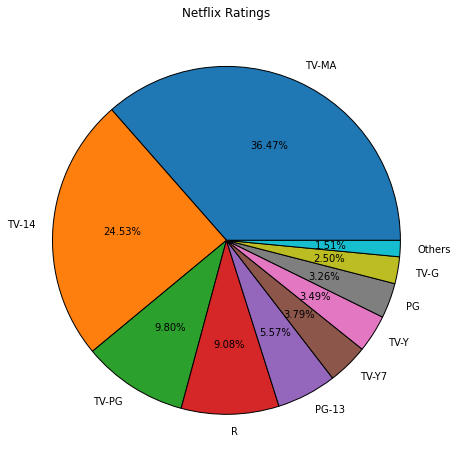

In [48]:
# Visualise the distribution of the different ratings in the dataset
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
plt.title("Netflix Ratings")

labels = list(df.rating.value_counts().index[0:-8])
values = list(df.rating.value_counts()[0:-8])

# remove last 3 indices as they were not ratings but instead durations
others = df.rating.value_counts()[-8:-3]
values.append(sum(others))
labels.append("Others")

plt.pie(values,labels=labels,autopct="%.2f%%",wedgeprops={"edgecolor":"black"})
plt.show()
AddNote("\nPart 2")
AddNote(f"The most common rating on Netflix is {labels[0]} with {values[0]} titles under it.")

In [21]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

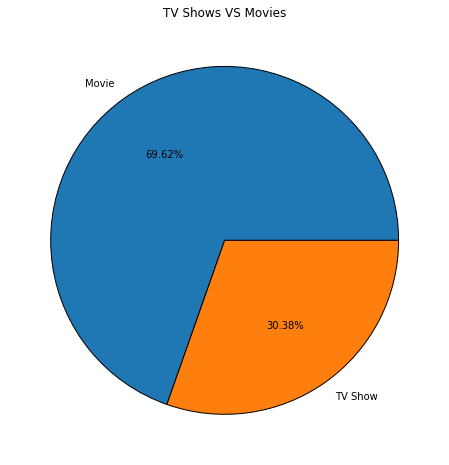

In [49]:
# Visualise the distribution of the number of TV Shows versus the number of Movies

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
plt.title("TV Shows VS Movies")

labels = df.type.value_counts().index
values = df.type.value_counts()

plt.pie(values,labels=labels,autopct="%.2f%%",wedgeprops={"edgecolor":"black"})
plt.show()
AddNote(f"{round(values[0]/sum(values) * 100)}% of the titles of Netflix are Movies while only {round(values[1]/sum(values)*100)}% are TV Shows.")

In [50]:
tv_df = df[df.type == "TV Show"]

# fig = plt.figure(figsize=(8,8))
# fig.patch.set_facecolor('white')
# plt.title("Duration of Shows")

# labels = tv_df.duration.value_counts().index
# values = tv_df.duration.value_counts()

# plt.pie(values,labels=labels,autopct="%.2f%%",wedgeprops={"edgecolor":"black"})
# plt.show()

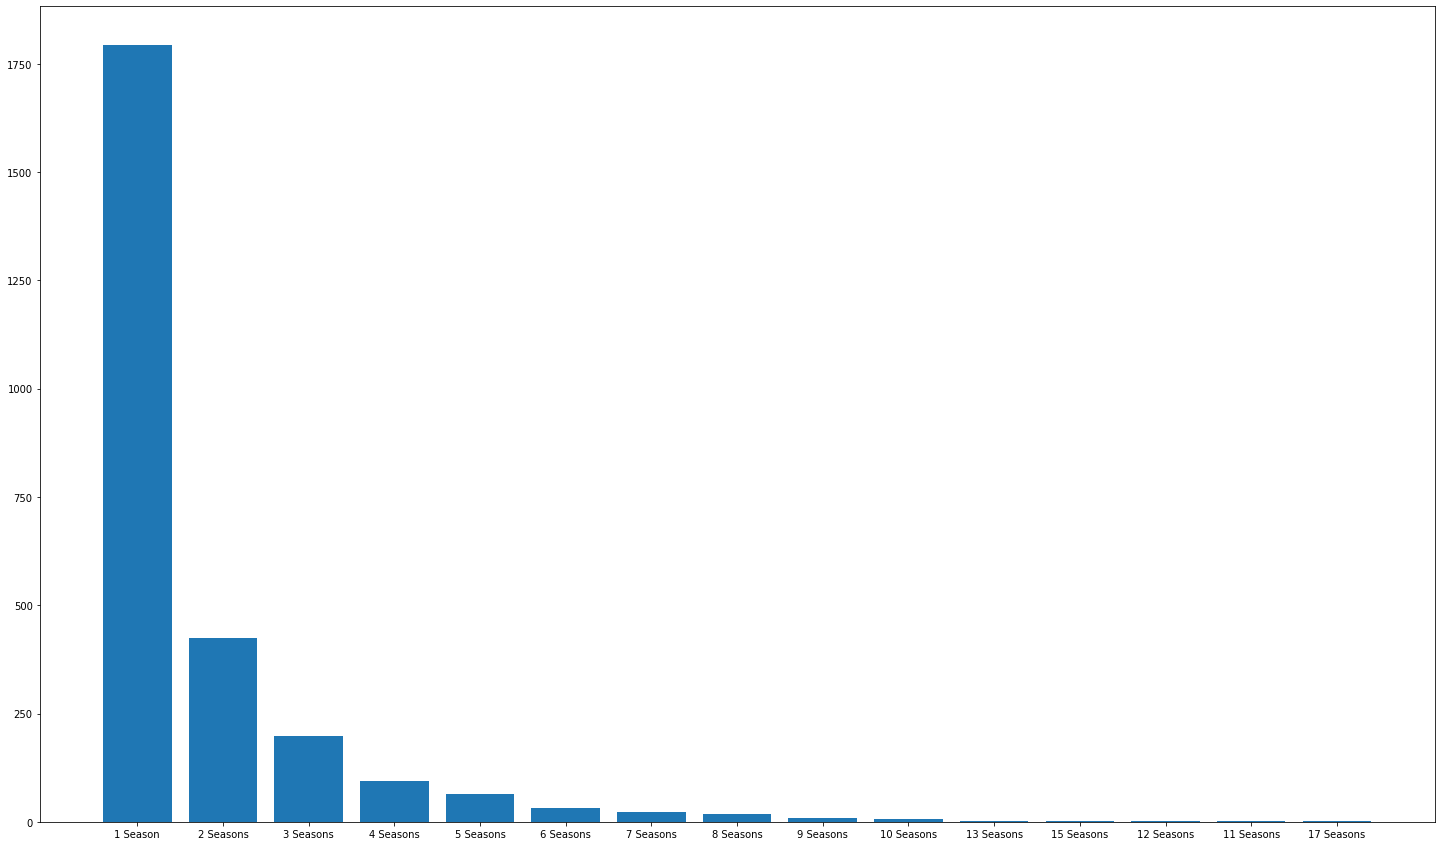

In [51]:
# o Visualise the distribution of the different TV Shows based on the number of Seasons
shows = tv_df.duration.value_counts()

plt.figure(figsize=(25,15))
plt.bar(shows.index,shows.values,label='Length')
plt.show()
AddNote(f"{shows[0]} shows on netflix have {shows.index[0]} but only {shows[-1]} show has {shows.index[-1]}.")

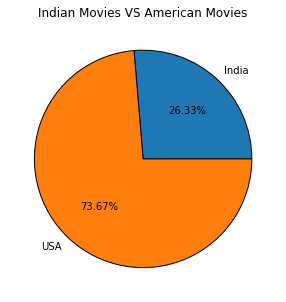

In [54]:
# Visualise the distribution of movies that have been produced in India versus those produced in the United States
fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('white')
plt.title("Indian Movies VS American Movies")

india.count()[0]
usa.count()[0]
plt.pie([india.count()[0],usa.count()[0]],labels=["India","USA"],autopct="%.2f%%",wedgeprops={"edgecolor":"black"})
plt.show()
AddNote(f"On Netflix, American movies are almost 75% more abundant than Indian movies.")

In [55]:
print("\n".join(notes))

Part 1
There were 4307 missing values in the original dataset
There are 6131 movies on Netflix.
There are 893 movies from India on Netflix.
There are 2498 moviews from the USA on Netflix

Part 2
The most common rating on Netflix is TV-MA with 3211 titles under it.
70% of the titles of Netflix are Movies while only 30% are TV Shows
1793 shows on netflix have 1 Season but only 1 show has 17 Seasons
American movies are almost 75% more abundant on Netflix than Indian movies
On Netflix, American movies are almost 75% more abundant than Indian movies
